In [44]:
DATA_PATH =  f'..\\data\\processed\\1_preprocessed_df.pkl'
ROLES_PATH = f'..\\data\\raw\\roles_short_names.csv'

FIG_DIR = f'..//reports//figures'

ROLE_COLS      = ['DevType']
TECH_COLS      = ['LanguageHaveWorkedWith',
                  'DatabaseHaveWorkedWith',
                  'PlatformHaveWorkedWith',
                  'WebframeHaveWorkedWith',
                  'MiscTechHaveWorkedWith',
                  'ToolsTechHaveWorkedWith',
                  'NEWCollabToolsHaveWorkedWith']

In [83]:
import os


import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff



from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import StandardScaler

In [46]:
raw_df = pd.read_pickle(DATA_PATH)
roles_names = pd.read_csv(ROLES_PATH, sep=';')

In [47]:
tech_df = raw_df[TECH_COLS]
tech_df.sample(1)

,LanguageHaveWorkedWith,DatabaseHaveWorkedWith,PlatformHaveWorkedWith,WebframeHaveWorkedWith,MiscTechHaveWorkedWith,ToolsTechHaveWorkedWith,NEWCollabToolsHaveWorkedWith
3721,"[Groovy, HTML/CSS, JavaScript, Ruby, SQL]","[Elasticsearch, MongoDB, MySQL, Redis]",[Amazon Web Services (AWS)],"[Node.js, React, Ruby on Rails]",[RabbitMQ],"[Kubernetes, Maven (build tool), npm, Webpack,...","[IntelliJ IDEA, RubyMine, Visual Studio Code]"


In [48]:
raw_df[ROLE_COLS].iloc[62162]

DevType    []
Name: 62162, dtype: object

In [49]:
raw_df.head(5)

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,[],NaN,[],NaN,[],[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"[Employed, full-time]",Remote,"[Hobby, Contribute to open-source projects, Bo...","Bachelor’s degree (B.A., B.S., B.Eng., etc.)","[Books / Physical media, Colleague, Friend or ...",[Formal documentation provided by the owner of...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,"[DevOps function, Microservices, Automated tes...","Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"[Employed, full-time]","Hybrid (some remote, some in-person)","[Hobby, Professional development or self-paced...","Bachelor’s degree (B.A., B.S., B.Eng., etc.)","[Books / Physical media, Colleague, On the job...",[Formal documentation provided by the owner of...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,"[DevOps function, Microservices, Automated tes...","Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"[Employed, full-time]","Hybrid (some remote, some in-person)",[Hobby],"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","[Colleague, Friend or family member, Other onl...",[Formal documentation provided by the owner of...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,"[Automated testing, Continuous integration (CI...",NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"[Employed, full-time, Independent contractor, ...",Remote,"[Hobby, Contribute to open-source projects, Pr...","Bachelor’s degree (B.A., B.S., B.Eng., etc.)","[Books / Physical media, Online Courses or Cer...",[Formal documentation provided by the owner of...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,"[Microservices, Automated testing, Observabili...",Other,Appropriate in length,Neither easy nor difficult,23456.0


Handle Category Data  

In [50]:
df = raw_df.copy()
encoded_dfs = {}
for col in ROLE_COLS + TECH_COLS:
    print(col)
    binarizer = MultiLabelBinarizer()
    encoded_df = pd.DataFrame(binarizer.fit_transform(df[col]),
                               columns=binarizer.classes_,
                               index=df[col].index)
    encoded_dfs[col] = encoded_df


DevType
LanguageHaveWorkedWith
DatabaseHaveWorkedWith
PlatformHaveWorkedWith
WebframeHaveWorkedWith
MiscTechHaveWorkedWith
ToolsTechHaveWorkedWith
NEWCollabToolsHaveWorkedWith


In [51]:
df = pd.concat(encoded_dfs , axis = 1)
df

DevType                                           \
      Academic researcher Blockchain Cloud infrastructure engineer   
0                       0          0                             0   
1                       0          0                             0   
2                       0          0                             0   
3                       0          0                             0   
4                       0          0                             0   
...                   ...        ...                           ...   
89179                   0          0                             0   
89180                   0          0                             0   
89181                   0          0                             0   
89182                   0          0                             0   
89183                   0          0                             0   

                                                                              \
      Data or business analyst Data scientist or machine learning specialist   
0                            0                                             0   
1                            0                                             0   
2                            0                                             0   
3                            0                                             0   
4                            0                                             0   
...                        ...                                           ...   
89179                        0                                             0   
89180                        0                                             0   
89181                        0                                             0   
89182                        0                                             0   
89183                        0                                             0   

                                                                            \
      Database administrator Designer DevOps specialist Developer Advocate   
0                          0        0                 0                  0   
1                          0        0                 0                  0   
2                          0        0                 0                  0   
3                          0        0                 0                  0   
4                          0        0                 0                  0   
...                      ...      ...               ...                ...   
89179                      0        0                 0                  0   
89180                      0        0                 0                  0   
89181                      0        0                 0                  0   
89182                      0        0                 0                  0   
89183                      0        0                 0                  0   

                            ... NEWCollabToolsHaveWorkedWith               \
      Developer Experience  ...                       Spyder Sublime Text   
0                        0  ...                            0            0   
1                        0  ...                            0            0   
2                        0  ...                            0            0   
3                        0  ...                            0            0   
4                        0  ...                            0            0   
...                    ...  ...                          ...          ...   
89179                    0  ...                            0            1   
89180                    0  ...                            0            0   
89181                    0  ...                            0            0   
89182                    0  ...                            0            0   
89183                    0  ...                            0            0   

                                                 

## Plot Jobs Frequency

D:\End to End Data Science Projects\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

D:\End to End Data Science Projects\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

D:\End to End Data Science Projects\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



[Text(0, 0, '25735'),
 Text(0, 0, '13745'),
 Text(0, 0, '5071'),
 Text(0, 0, '3904'),
 Text(0, 0, '3080'),
 Text(0, 0, '2597'),
 Text(0, 0, '2033'),
 Text(0, 0, '1996'),
 Text(0, 0, '1845'),
 Text(0, 0, '1588')]

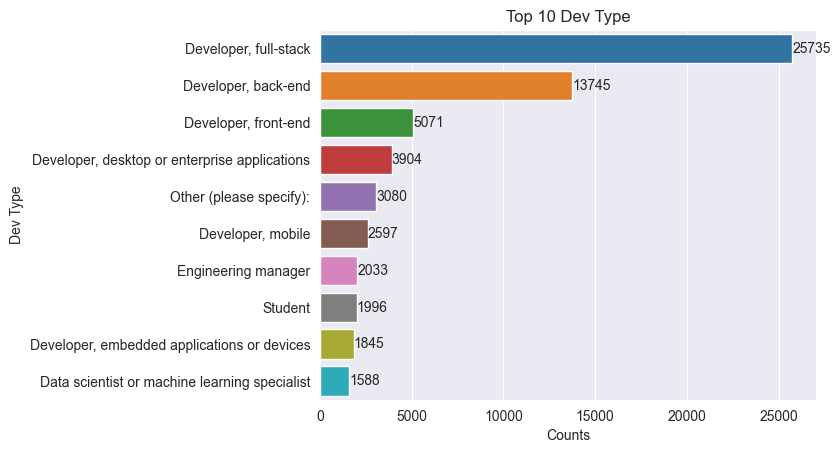

<Figure size 3000x1500 with 0 Axes>

In [52]:
job_freq = df['DevType'].copy().sum().sort_values(ascending=False).nlargest(10).reset_index()


fig1 , ax = plt.subplots()
sns.barplot(data= job_freq ,x = job_freq[0],y = job_freq['index'])
ax.set(ylabel='Dev Type',xlabel='Counts', title='Top 10 Dev Type')
plt.figure(figsize = (30 , 15))
ax.bar_label(ax.containers[0])

## Plot Skills Frequency


In [53]:
skills_freq = df.copy().drop(columns=['DevType'] , axis=1).sum().sort_values(ascending=False).reset_index()
columns_name = ['Group' , 'Skill' , 'freq']
skills_freq.columns = columns_name


fig2 = px.treemap(
    data_frame=skills_freq , 
    path= ['Group' , 'Skill'] , 
    values='freq' , color='freq' ,
    color_continuous_scale='deep')

fig2.update_layout(width =1500 , height = 700)
fig2.show()


### Jobs & Skills heatmap 

In [54]:
sorted_roles = df['DevType'].sum().sort_values().index.to_list()
sorted_skills = df.drop('DevType' , axis = 1).sum().sort_values(ascending=False).droplevel(level=0).index.to_list()

In [55]:
skills = []

for role in sorted_roles:
    role_mask = (df[('DevType', role)] == 1)

    skills_role = pd.concat({tech_col: df.loc[role_mask, tech_col].mean() * 100 for tech_col in TECH_COLS})

    skills.append(skills_role)

# Concat and format
skills = pd.concat(skills , axis=1)
skills.columns = sorted_roles
skills = skills.reset_index(level=0, drop=True)
skills = skills.loc[sorted_skills]
skills = skills.T

In [56]:
skills

,Visual Studio Code,JavaScript,HTML/CSS,Python,SQL,Docker,npm,PostgreSQL,TypeScript,Amazon Web Services (AWS),...,build2,TiDB,Raku,condo,tunit,snitch,lest,CUTE,ELFspy,liblittletest
Marketing or sales professional,57.718121,56.375839,55.704698,45.637584,40.939597,28.187919,32.214765,30.872483,16.778523,32.214765,...,2.013423,2.684564,0.671141,1.342282,1.342282,0.671141,0.671141,1.342282,0.671141,0.671141
Developer Advocate,73.584906,63.679245,56.603774,42.452830,46.698113,52.830189,43.867925,44.339623,34.433962,50.943396,...,0.000000,0.000000,0.000000,0.000000,0.471698,0.000000,0.471698,0.000000,0.000000,0.000000
Database administrator,51.361868,29.571984,31.517510,42.412451,82.879377,25.680934,11.284047,30.350195,6.614786,29.571984,...,0.389105,0.778210,0.389105,0.389105,0.389105,0.389105,0.000000,0.000000,0.000000,0.000000
Designer,58.007117,61.565836,62.989324,30.249110,29.893238,21.352313,30.604982,16.725979,18.149466,21.352313,...,0.355872,0.000000,0.711744,0.355872,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Hardware Engineer,58.741259,25.524476,27.622378,69.930070,22.027972,26.573427,15.734266,12.937063,6.993007,14.685315,...,0.000000,0.000000,1.048951,0.349650,0.349650,0.000000,0.000000,0.349650,0.000000,0.349650
Blockchain,68.111455,62.229102,38.390093,41.795666,30.340557,52.631579,50.464396,50.154799,52.321981,50.773994,...,0.928793,0.619195,0.309598,0.619195,0.619195,0.309598,0.619195,0.309598,0.309598,0.309598
Developer Experience,73.312883,55.214724,38.343558,49.693252,36.503067,55.521472,41.411043,36.503067,40.184049,51.226994,...,0.920245,0.613497,0.000000,1.226994,0.306748,0.306748,0.306748,0.613497,0.306748,0.000000
Scientist,51.566952,27.635328,25.071225,77.492877,27.920228,29.344729,12.250712,19.943020,7.122507,21.367521,...,0.284900,0.284900,0.284900,0.569801,0.284900,0.284900,0.284900,0.000000,0.000000,0.284900
Educator,65.542169,57.831325,56.144578,63.132530,45.783133,27.951807,31.325301,29.638554,20.000000,25.060241,...,0.000000,0.000000,0.240964,0.240964,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"Engineer, site reliability",71.896956,49.882904,40.046838,71.896956,44.496487,72.131148,38.875878,55.503513,31.850117,64.402810,...,0.000000,0.234192,0.234192,0.234192,0.000000,0.000000,0.234192,0.000000,0.000000,0.000000


In [57]:
fig3 = go.Figure(data=go.Heatmap(x = skills.columns , y = skills.index , z = skills))
fig3.update_layout(width=2500, height=700)
fig3.show()
fig3.write_html(os.path.join(FIG_DIR, 'heatmap.html'))

In [76]:
roles_short_dict = roles_names.set_index('Original name')["Short name "].to_dict()
short_labels = []

for role in sorted_roles :
    if(roles_short_dict.__contains__(role)):
        short_labels.append(roles_short_dict[role])
    else :
        short_labels.append(role)


33

In [81]:
fig = ff.create_dendrogram(skills , labels=short_labels , orientation='left' , )
fig.update_layout(height=700, width=1000, showlegend=False)
fig.show()

### Normalizing Features

In [84]:
std_skills = StandardScaler().fit_transform(skills)
std_skills = pd.DataFrame(std_skills, columns=skills.columns, index=skills.index)

In [85]:
fig3 = go.Figure(data=go.Heatmap(x = std_skills.columns , y = std_skills.index , z = std_skills))
fig3.update_layout(width=2500, height=700)
fig3.show()
fig3.write_html(os.path.join(FIG_DIR, 'std_heatmap.html'))

In [105]:
# role = 'Developer, embedded applications or devices'
role = 'Data scientist or machine learning specialist'
#role = 'Developer, back-end'
#role = 'Product manager'

In [106]:
single_role_skills = pd.concat([skills.loc[role], std_skills.loc[role]], axis=1)
single_role_skills.columns = ['percentage', 'specificity']
single_role_skills = single_role_skills.sort_values('percentage')

In [107]:
#single_role_skills

In [108]:
threshold = 25

single_role_skills = single_role_skills[single_role_skills['percentage'] > threshold]


fig = px.bar(df, 
             y=single_role_skills.index, 
             x=single_role_skills['percentage'], 
             color=single_role_skills['specificity'], 
             color_continuous_scale='orrd', 
             range_color=[std_skills.values.min(),std_skills.values.max()],
             orientation='h')

fig.update_layout(width=800, height=800, title=role)
fig.show()